In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [2]:
# A callback routine is a way to perform host-side execution of code at runtime.

In [3]:
# Example is jax.debug.print(). This works by passing the runtime value of y as a CPU jax.Array back to the host process, 
# where the host can print it.

Jax has a variety of callbacks
* jax.pure_callback(): callback to pure functions in python
* jax.experimental.io_callback(): callback for impure funtions, with io to disk
* jax.debug.callback(): appropriate for functions that should reflect the execution behaviour of the compiler


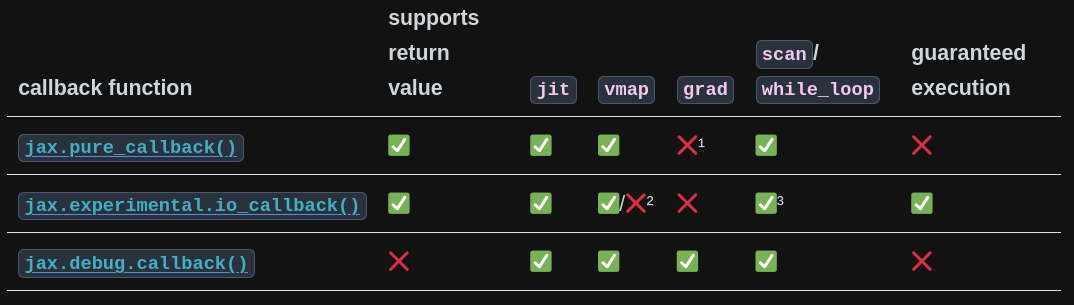

By design functions passed to pure_callback are treated as if they have no side-effects: one consequence of this is that if the output of the function is not used, the compiler may eliminate the callback entirely

io_callback don't allow autodiff. However, if the the function being differentiated does not pass the variable to io_callback, then this function can be differentiated.

In [6]:
import jax
from jax.experimental import io_callback
@jax.jit
def f(x):
  io_callback(lambda: print('hello'), None)
  return x

jax.grad(f)(1.0);


hello


Unlike pure_callback, the compiler will not remove the callback execution in this case, even though the output of the callback is unused in the subsequent computation.